#**Corrosion and Non-Corrosion Image Detections**.
#1.0 Introduction#

Subsea pipelines transport offshore hydrocarbons to onshore facilities, but harsh underwater conditions cause corrosion, posing safety risks, financial losses, and environmental harm. This study examines the efficacy of using machine learning and computer vision for detecting corrosion in subsea pipelines. Data that share same characteristics with an Aberdeen-based energy firm's data will be used to create algorithms and compare them to existing methods. The study will provide insights into the potential of these techniques for future corrosion classification research.

##**1.1 Importing Images**

We chose surface and underwater images for the experiment after reviewing the inspector's requirements. These were uploaded to Google Drive and imported into Jupyter using a Python script that referred to the "gdrive" path








In [ ]:
from google.colab import drive # The code reading the folder containing all the images in the zip folders on google drive

drive.mount("/content/gdrive") # This code created a temporary gdrive on the google collab environemt. This is the path that links the datasets as images to the jupyter notebook on googlr collab



Mounted at /content/gdrive


In [ ]:
# cd /content/gdrive/MyDrive/Dataset/Surface/ # This is available to change the directory on the google drive


##**1.2 Installing all the Required Python Libraries**

The library that will be used in this research are not limited to Open-CV, Matplotlib, Keras, tensorflow and seaborn libraries.

In [ ]:
!pip install opencv-python # Installing the opencv library 
!pip install matplotlib # Installing thr matplotlib
!pip install keras  #Installing Keras library
!pip install tensorflow # Installing tensorflow
!pip install seaborn # This is another image viisualisation. It helps to show the confusion matrix and AUC curve


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##**1.3 Importing all the Required Libraries**##

Installing a library is one thing and calling or inporting the difference function under these libraries is another. This work focuses on these functions in each of the libraray installed above. 

In [ ]:
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import glob
import os # Inporting all the relevant libraries that will be needed to read the multiple images from the surface datasets of images provided in the coursework
import numpy as np #Loading the numpy array library to allow for basic arithmetic and data some preparation functions
from sklearn.model_selection import train_test_split #
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score ## Running the Scores Library from the SVM
import numpy as np #Importing the numpy library. Its installation mostly comes with open-cv. It can also be installed seperatly.
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
#from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from sklearn.svm import SVC


In [ ]:
ls # Checking the list of the document under surface datasets. These are images with positive and negaive clases.Negative indicate corrosion and Positive indicate non-corossion images

gdrive/  sample_data/


#**1.4 Reading The Images**.
Datasets with corrosion and non-corrosion images have been linked to Google Collab via the script. The first experiment uses the Surface dataset, with 1104 Negative (non-corrosion) and 128 Positive (corrosion) images. 

In [ ]:
resize_width = 100 #Resizing the width of the images to 100
resize_height = 100 #Resizing the Lenghts of the Images to 100
path = '/content/gdrive/MyDrive/Dataset/Surface/' #Reading the path
_images = [] # List to append the images as 2D numpy arrays.
_target = [] # List to append the target
O_repo = [] # Create a repo for flattened pixels
repothreshold1 = [] #Creeating the empty list for  Binarised images for feature extraction

for root, dirs, files in os.walk(path): #Looping through each images through the directories in the gdrive path.
     for file in files:
        with open(os.path.join(root, file), "r") as auto:
            try:
                img = cv2.imread(root+'/'+file, 0) #Reading the images into a variable img
                #imgshow = plt.imshow(img)
                img = cv2.resize(img, (resize_width, resize_height)) #Effecting the resized template.
                ret,threshold1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY) #This is not required at this level. It was just created if there is need for further research on this work.
                repothreshold1.append(threshold1)
                _images.append(img)
                # Append the flattened image to the pixel repo
                O_repo.append(img.flatten())
                # Append the folder where the image is to the target list
                _target.append(root.replace(path,'').replace('\\','').replace('/','')) #joining the target in the path directory to the variables and replacing slashes with nothing.
            except Exception as e:
                print("Invalid file "+file+" skipped.")
# Convert the repo list into numpy array
O_repo = np.array(O_repo)
repothreshold1 = np.array(repothreshold1)
_images = np.array(_images)
#_target = np.array(_target)
#plt.imshow(_images)
print('Threshold Datasets:', repothreshold1)
print('The classes of Surface data:', _target)
print('Shapes of the surface data:',repothreshold1.shape)
print('The size of the Surface datasets:', repothreshold1.size)
print('The shape of the surfaces', _images.shape)
#print('The size of the Target Images:', _target.size)


Invalid file rusted_airplane_53.jpg skipped.
Invalid file rusted_car_72.jpg skipped.
Invalid file rusted_objects_398.jpg skipped.
Invalid file rusted_objects_40.jpg skipped.
Threshold Datasets: [[[255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  ...
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]]

 [[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0 255   0 ... 255   0   0]
  ...
  [  0   0   0 ...   0 255 255]
  [  0   0   0 ... 255 255 255]
  [  0   0   0 ...   0 255 255]]

 [[  0   0   0 ... 255 255 255]
  [  0   0   0 ... 255 255 255]
  [  0   0   0 ... 255 255 255]
  ...
  [255 255 255 ... 255 255   0]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255   0 255]]

 ...

 [[255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  ...
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]]



#1.5 Comments:#
From the gdrive directory, the code created four images: _Images, _targets, o_repo, and repothreshold1. Task one doesn't involve image extraction, so the raw images were used. The _images variable contains 1228 3D images, reshaped to 100x100. Targets are binary categorical classes of Positive and Negative of the same size. Four rusted images were skipped.

##**1.6 Image Visualisation**##
A three by two images is the viewing of the images by 2 rows and 3 columns. All the images to be displayed are 6. The codes are flexible to accomodate more number of images in grey pixels.

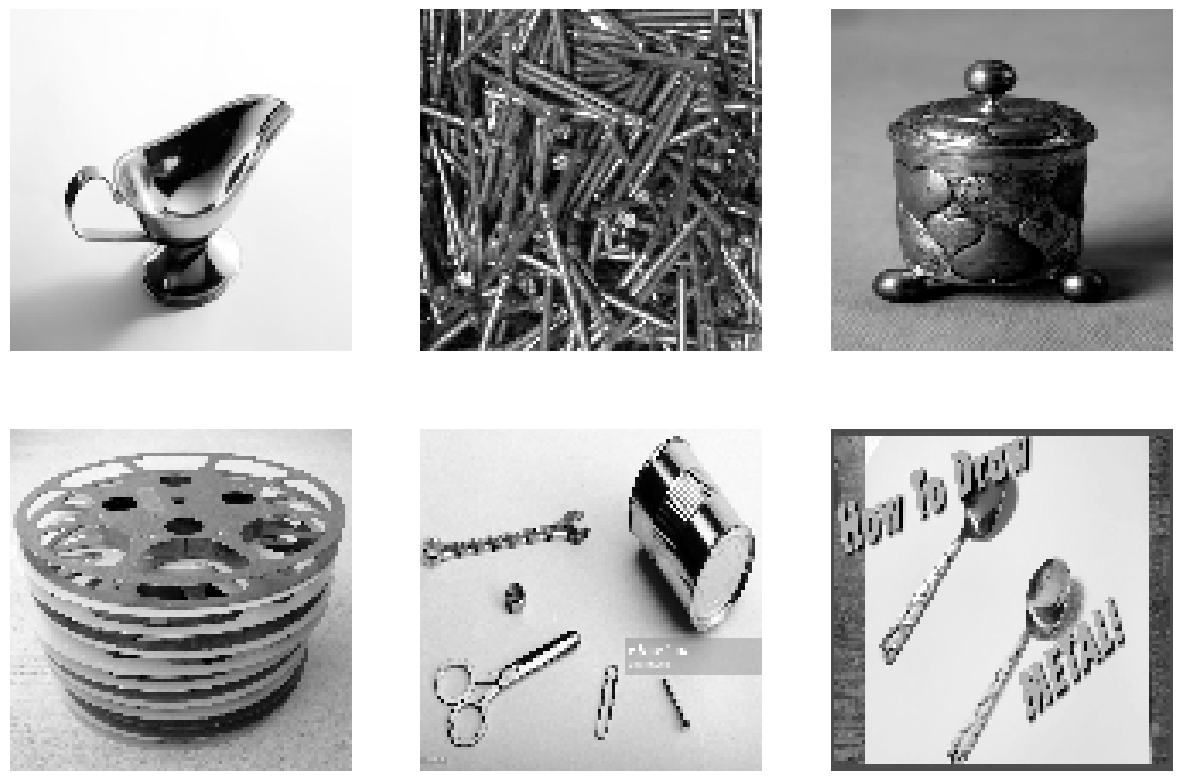

In [ ]:


# Define the number of rows and columns for the subplot grid
nrows = 2 # Number of columns
ncols = 3 # Number of rows.

# Create a new figure and set its size
fig, axs = plt.subplots(nrows, ncols, figsize=(15, 10))

# Loop through the images and plot them in the subplot grid
for i in range(nrows):
  for j in range(ncols):
    # Compute the index of the current image
    idx = i * ncols + j
    # Get the image from the repothreshold4 list
    img = _images[idx]
    #img = repothreshold1[idx]
    # Plot the image in the subplot grid
    axs[i, j].imshow(img, cmap='gray')
    axs[i, j].axis('off')

# Show the plot
plt.show()

##**1.7 Plot a Bar chart**##
The _target class displays corrosion and non-corrosion images. Imbalances may occur in the binary class, so visualization helps in selecting an appropriate  approach.

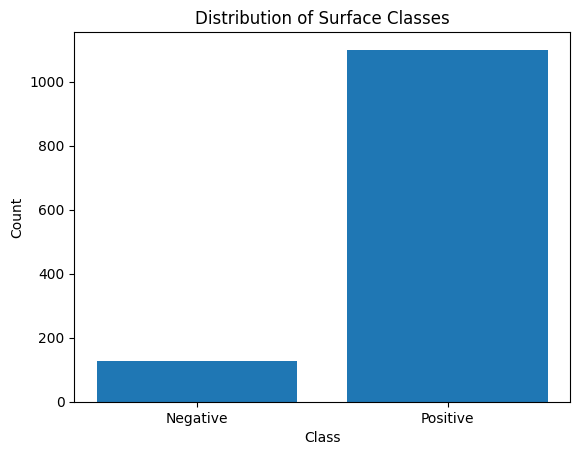

In [ ]:


# Count the occurrences of each target value
target_counts = {}
for target in _target:
    if target in target_counts:
        target_counts[target] += 1
    else:
        target_counts[target] = 1

# Create a bar chart of the target counts
plt.bar(target_counts.keys(), target_counts.values())

# Add axis labels and title
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Surface Classes')

# Show the plot
plt.show()




#1.8 Comments:#
The bar chart above indicates more positive than negative classes, suggesting an 11% to 89% dataset imbalance. This creates potential for overfitting.

In [ ]:
np.unique(_target) # Shows the unique values of the class which are Positive and Negative as seen below.

array(['Negative', 'Positive'], dtype='<U8')

##**1.9 Binarising the Class**##
Class Binarization is vital in Supervised Learning to convert categorical variables into integers for machine learning processes.

In [ ]:
target_Binarisation = [] #Create an empty list for binarised target.
target_Binarisation = [1 if i == 'Positive' else 0 for i in _target] #Ascribe number 1 to positive and 0 to negative since this is not a medical data.
target_Binarisation=np.array(target_Binarisation) #Convert the target to numpy array
print(target_Binarisation,target_Binarisation.shape) #Print the shape of the new class.

[0 0 0 ... 1 1 1] (1228,)


In [ ]:
np.unique(target_Binarisation) #Now show the new unique classes after Binarisation

array([0, 1])

In [ ]:
O_repo.shape # Checking the shape of the 0_repo images.

(1228, 10000)

##**1.2.2 Setting Up 5 Cross Validation Methods**##

This study will utilize 5-fold cross-validation with SVM-linear using SKlearn. This involves dividing data into five parts, training on four and testing on one, repeatedly. It is a common and effective evaluation technique.

In [ ]:
from sklearn.model_selection import StratifiedKFold # importing startifiedkfold library for cross validation. 

In [ ]:
CrossValidation = StratifiedKFold(n_splits=5) # Setting the cross validation to 5 using a Startified sampling method.
CrossValidation.get_n_splits(O_repo, target_Binarisation) # fitiing the 5 fold cross validation function
print(CrossValidation) # Print the cross validation variable called CrossValidation.

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)


In [ ]:

svm_model = SVC(kernel='linear')


y_train_categorical = np_utils.to_categorical(target_Binarisation, 2) #changing array to vectors
#y_test_categorical = np_utils.to_categorical(y_test, 2)
# Show a sample target entry. You will see that this sample corresponds to a 5 as
# there is a five in the 0th position (remember that python starts in 0)
print(y_train_categorical[2:4]) #print y train vectors between index 2 and 3
print(y_train_categorical[-1])  #Pr


[[1. 0.]
 [1. 0.]]
[0. 1.]


##**1.2.3 Fitting the SVM Model**##



In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import StratifiedKFold

accuracy = []
precision = []
recall = []
fscore = []

for fold, (train_indices, val_indices) in enumerate(CrossValidation.split(_images, np.argmax(y_train_categorical, axis=1))):
    # Get the training and validation data for this fold
    X_train, y_train = O_repo[train_indices], np.argmax(y_train_categorical[train_indices], axis=1)
    X_val, y_val = O_repo[val_indices], np.argmax(y_train_categorical[val_indices], axis=1)

    # Train the model on this fold
    svm_model.fit(X_train, y_train)

    y_pred = svm_model.predict(X_val)

    # Calculate precision, recall, F1-score, and accuracy for this fold
    precision.append(precision_score(y_val, y_pred, average='weighted'))
    recall.append(recall_score(y_val, y_pred, average='weighted'))
    fscore.append(f1_score(y_val, y_pred, average='weighted'))
    accuracy.append(accuracy_score(y_val, y_pred))

# Print the sizes of the trained and tested datasets
print('Sizes of the Trained Balanced Dataset:', X_train.shape)
print('Sizes of the Tested Balanced Dataset:', X_val.shape)

# Calculate the average precision, recall, F1-score, and accuracy across all folds
print('Mean Precision:', np.mean(precision))
print('Mean Recall:', np.mean(recall))
print('Mean F1-score:', np.mean(fscore))
print('Mean Accuracy:', np.mean(accuracy))


Sizes of the Trained Balanced Dataset: (983, 10000)
Sizes of the Tested Balanced Dataset: (245, 10000)
Mean Precision: 0.8306940957419217
Mean Recall: 0.8583142525302805
Mean F1-score: 0.8427239256434298
Mean Accuracy: 0.8583142525302805


##1.2.7 Comment##

These metrics are for evaluating the performance of a binary classification model trained using SVM algorithm with 5 fold cross validations.

1.  **The average accuracy** level of the model is 85.8%. It means the model performance in predicting the positive and negatives classes is at 85.8%. 
2. **Recall:** 85.8%, which indicates the proportion of all positive samples that were correctly identified by the model.
3. **Precision:** The average precision is 83.1%, which is the proportion of only positive samples that were correctly classified as positive.   
4. **The average Fscore** is 0.842(84.2%), which is the harmonic mean of precision and recall, and indicates good overall performance of the model because its either close to 1 or 100%. The F1 score is beter use to determine the overall model performance than any other metrics.





##**1.2.8 Applying Convolution Neural Networks on the Surface Datasets**##
Based on the requirement of this research, CNN as one of  the neural network model will be applied on the surface images for classification. This research shall use thesame Five fold cross validationto fit the CNN.

In [ ]:
CrossValidation1 = StratifiedKFold(n_splits=5) # Setting the cross validation to 5 using a Startified sampling method.
CrossValidation1.get_n_splits(_images, target_Binarisation) # fitiing the 5 fold cross validation function
print(CrossValidation1) # Print the cross validation variable called CrossValidation.

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)


In [ ]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'

In [ ]:
y_train_categorical = np_utils.to_categorical(target_Binarisation, 2) #changing array to vectors
#y_test_categorical = np_utils.to_categorical(y_test, 2)
# Show a sample target entry. You will see that this sample corresponds to a 5 as
# there is a five in the 0th position (remember that python starts in 0)
print(y_train_categorical[2:4]) #print y train vectors between index 2 and 3
print(y_train_categorical[-1])  #Print from last pixel numbers
#plt.imshow(y_train_categorical[0])

[[1. 0.]
 [1. 0.]]
[0. 1.]


##**1.2.9 Convolutional Neural Network Architecture**##
CNN architecture involves some basic steps which are shown with proper code comment below.

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout #Running the library

#Set the seed to allow the model output to be reproducible
np.random.seed(123)

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100,100,1))) # 32 filters of size 3x3, using the ReLU activation function. The input shape is (100,100,1), indicating that the input images are grayscale (1 channel).
model.add(Conv2D(32, (3, 3), activation='relu')) # This adds another convolutional layer with 32 filters of size 3x3, using the ReLU activation function.
model.add(MaxPooling2D(pool_size=(2,2))) # The max pool unit of 2 by 2 is used to downsample the feature maps from the previous layers
model.add(Dropout(0.25)) # Drop out of random 25% is used to eliminate biases as a result of model overfitting.
model.add(Flatten()) # Images are flatten to fit into the architecture of CNN
model.add(Dense(128, activation='relu')) #This adds a fully connected dense layer with 128 neurons and the ReLU activation function.
model.add(Dropout(0.5)) # Drop out of random 50% is used to eliminate biases as a result of model overfitting.
model.add(Dense(2, activation='softmax')) # This adds the output layer, which has 2 neurons and uses the softmax activation function to output the probabilities of each class.

In [ ]:
model.summary() # Model summary

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 48, 48, 32)        0         
                                                                 
 flatten (Flatten)           (None, 73728)             0         
                                                                 
 dense (Dense)               (None, 128)               9437312   
                                                        

##**1.3.0 Compilation and Evaluation of CNN Model**##

This session compiles the CNN model and try to use different evauation technics to access the performance of the model.

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) # Compiling the model accuracy and loss rates.

In [ ]:
# Evaluate the model using cross validation

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
accuracy = []
precision = []
recall = []
fscore = []

for fold, (train_indices, val_indices) in enumerate(CrossValidation1.split(_images, np.argmax(y_train_categorical, axis=1))):
    
    
    # Get the training and validation data for this fold
    X_train, y_train = _images[train_indices], y_train_categorical[train_indices] #y_train_categorical is used because this function allows only a vector. The result is calculated above
    X_val, y_val = _images[val_indices], y_train_categorical[val_indices]
    
    # Train the model on this fold
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val)) #Model fitting.

    y_pred = model.predict(X_val) #Target prediction
    y_pred = np.argmax(y_pred, axis=1) 
    y_val = np.argmax(y_val, axis=1) # applying the predictive model on the test data
     # Obtaining the model evaluation metrics
    precision.append(precision_score(y_val, y_pred, average='weighted'))
    recall.append(recall_score(y_val, y_pred, average='weighted'))
    fscore.append(f1_score(y_val, y_pred, average='weighted'))
    #Sizes of the train and Test Images
print('Sizes of the Trained Balanced Dataset:',X_train.shape) # Training Sshape
print('Sizes of the Tested Balanced Dataset:',X_val.shape) # Testing Shape
    #Finding the averages of the 5 fold evaluation metrics results.
print('Mean Precision:', np.mean(precision))
print('Mean Recall:', np.mean(recall))
print('Mean F1-score:', np.mean(fscore))
    


Epoch 1/10
31/31 [==============================] - 11s 49ms/step - loss: 43.0448 - accuracy: 0.8187 - val_loss: 0.4158 - val_accuracy: 0.8902
Epoch 2/10
31/31 [==============================] - 1s 22ms/step - loss: 0.4648 - accuracy: 0.9043 - val_loss: 0.4816 - val_accuracy: 0.8902
Epoch 3/10
31/31 [==============================] - 1s 21ms/step - loss: 0.3066 - accuracy: 0.9145 - val_loss: 0.5191 - val_accuracy: 0.8943
Epoch 4/10
31/31 [==============================] - 1s 31ms/step - loss: 0.2403 - accuracy: 0.9338 - val_loss: 0.4505 - val_accuracy: 0.8943
Epoch 5/10
31/31 [==============================] - 1s 20ms/step - loss: 0.1933 - accuracy: 0.9430 - val_loss: 0.6122 - val_accuracy: 0.8943
Epoch 6/10
31/31 [==============================] - 1s 25ms/step - loss: 0.1377 - accuracy: 0.9562 - val_loss: 0.8211 - val_accuracy: 0.8902
Epoch 7/10
31/31 [==============================] - 1s 27ms/step - loss: 0.1177 - accuracy: 0.9562 - val_loss: 0.8623 - val_accuracy: 0.8902
Epoch 8/10


##**1.3.1 Evaluation of the Two Model**##
SVM and CNN models were tested on surface images. SVM gave reasonable metrics: Accuracy 0.86, recall 0.85, precision 0.90 Fscore 0.92. However, CNN outperformed with Accuracy 0.96, recall 0.97, precision 0.96, F1score 0.96. The high metrics are because the model extracted the inportant features of the surface images, used a five fold cross validation to train and test to obtain the model metrics.

##**2.0 Task 2**##
The requirement of this session is to use the best model which is CNN on the surface images and test on the underwater images to obtain the model evaluation metrics.
#2.1 Read the Underwater Images# 


In [ ]:
resize_width = 100 #Resizing the width of the images
resize_height = 100 #Resizing the Lenghts of the Images
path = '/content/gdrive/MyDrive/Dataset/Underwater' #Reading the path
_imagesUnder = [] # List to append the images as 2D numpy arrays.
_targetUnder = [] # List to append the target
O_repoUnder = [] # Create a repo for flattened pixels
repothreshold1Und = []

for root, dirs, files in os.walk(path):
     for file in files:
        with open(os.path.join(root, file), "r") as auto:
            try:
                img = cv2.imread(root+'/'+file, 0)
                #imgshow = plt.imshow(img)
                img = cv2.resize(img, (resize_width, resize_height)) 
                ret,threshold1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
                repothreshold1Und.append(threshold1)
                _imagesUnder.append(img)
                # Append the flattened image to the pixel repo
                O_repoUnder.append(img.flatten())
                # Append the folder where the image is to the target list
                _targetUnder.append(root.replace(path,'').replace('\\','').replace('/',''))
            except Exception as e:
                print("Invalid file "+file+" skipped.")
# Convert the repo list into numpy array
O_repoUnder = np.array(O_repoUnder)
repothreshold1Und = np.array(repothreshold1Und)
_imagesUnder = np.array(_imagesUnder)
#_target = np.array(_target)
#plt.imshow(_images)
print('Print the Underwater threshold images in numpy array:', repothreshold1Und)
print('The Underwater classes:', _targetUnder)
print('Shapes of the Underwater images:',repothreshold1Und.shape)
print('The size  Underwater Images:', repothreshold1Und.size)
print('The shape underwater original _images', _imagesUnder.shape)
#print('The size of the Target Images:', _target.size)

Print the Underwater threshold images in numpy array: [[[  0   0   0 ...   0   0 255]
  [255   0   0 ... 255 255 255]
  [  0   0   0 ... 255 255 255]
  ...
  [255 255 255 ...   0   0   0]
  [255 255 255 ...   0   0   0]
  [255 255 255 ...   0   0   0]]

 [[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0 255   0 ...   0   0   0]
  ...
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]]

 [[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  ...
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]]

 ...

 [[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  ...
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]]

 [[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  ...
  [  0   0   0 ...   0   0   0]
  [  0

In [ ]:
print('shapes', _imagesUnder.shape) # Print the shapes of the variable _imagesUnder
print('shape surface', _images.shape) # # Print the shapes of the variable _images

shapes (54, 100, 100)
shape surface (1228, 100, 100)


##**2.2 Plot the Bar Chart-Underwater**##
The bar chart is on the class of the underwater images to check the imbalance ratio.

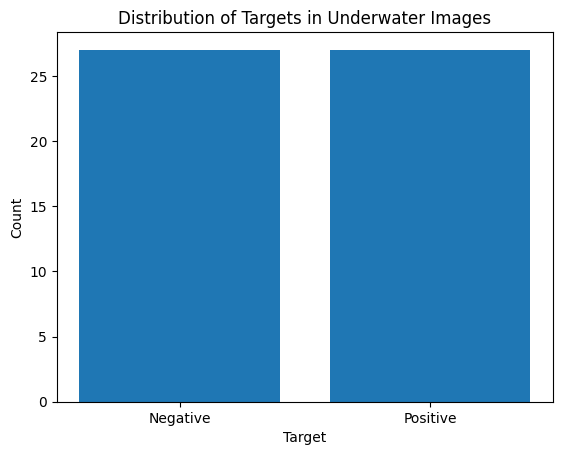

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each target value
target_counts = {}
for target in _targetUnder:
    if target in target_counts:
        target_counts[target] += 1
    else:
        target_counts[target] = 1

# Create a bar chart of the target counts
plt.bar(target_counts.keys(), target_counts.values())

# Add axis labels and title
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Distribution of Targets in Underwater Images')

# Show the plot
plt.show()


#2.3 Comments:#
The chart above shows that the classes are binary and are balanced. However, these set of images will be used as test datasets.

##**2.4 Reshaping the Images**##
In this session, images are reshaped to 100,100,1. We use one because we are working with a grey set of images. It is just two colors. Balck and white images.

##**2.5 Binarisation of the Underwater Class**
The Positive class is 1 and the negative class is 0

In [ ]:
target_Binarisationunder = []
target_Binarisationunder = [1 if i == 'Positive' else 0 for i in _targetUnder]
target_Binarisationunder=np.array(target_Binarisationunder)
print(target_Binarisationunder,target_Binarisationunder.shape)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] (54,)


In [ ]:
target_Binarisationunder1 = np.unique(target_Binarisationunder) #This shows the unique class. To reconfirm the condition for binary claases.
target_Binarisationunder1

array([0, 1])

##**2.6 Converting the Underwater datasets to a vector**
This fit the images into the CNN environment.

In [ ]:
#y_train_categorical = np_utils.to_categorical(target_Binarisation, 2) #Convert the list of target array to vector
y_test_categorical = np_utils.to_categorical(target_Binarisationunder, 2)
# Show a sample target entry. You will see that this sample corresponds to a 5 as
# there is a five in the 0th position (remember that python starts in 0)
print(y_train_categorical[3])
#plt.imshow(_images[3])
#plt.imshow(X_train[5])

[1. 0.]


##**2.7 Building the CNN Architecture and Summary**


In [ ]:
#Set the seed to allow the model output to be reproducible.

#At this point, we will use the following tunning:Conv2D is 32,(3,3),Activation is relu,Mxpooling is 2 by 2,First drop out is 25%, Second dropout is 50% and 
#dense is 2  with activation this time to be softmax.

np.random.seed(123)

model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100,100,1)))
model2.add(Conv2D(32, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(2, activation='softmax'))

In [ ]:
model2.summary() #Using the same  CNN model architecture as it was previously.

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 98, 98, 32)        320       
                                                                 
 conv2d_13 (Conv2D)          (None, 96, 96, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 48, 48, 32)        0         
                                                                 
 flatten_6 (Flatten)         (None, 73728)             0         
                                                                 
 dense_12 (Dense)            (None, 128)               9437312   
                                                      

## **2.8 Compile the CNN Model**##

In [ ]:
model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


## **2.9 Model Fitting and  Evaluation**##

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, confusion_matrix

In [ ]:
model2.fit(_images, y_train_categorical, epochs = 10, batch_size=32, verbose = 1 ) #Fitting the CNN Model

#Model Predictions 
y_pred3 = model2.predict(_imagesUnder)
y_pred3 = np.argmax(y_pred3, axis=1)

#Model Accuracy Metrics
accuracy2 = accuracy_score(target_Binarisationunder, y_pred3)
precision2 = precision_score(target_Binarisationunder, y_pred3, average='weighted')
recall2 = recall_score(target_Binarisationunder, y_pred3, average='weighted')
f12 = f1_score(target_Binarisationunder, y_pred3, average='weighted')

#Print the Evaluation Metrics
print('Test Accuracy for Task 2:', accuracy2)
print('Test Precision for Taks 2:', precision2)
print('Test Recall for Task 2:', recall2)
print('Test F1-score for Task2 :', f12)

Epoch 1/10
39/39 [==============================] - 3s 25ms/step - loss: 25.6891 - accuracy: 0.8363
Epoch 2/10
39/39 [==============================] - 1s 18ms/step - loss: 0.4353 - accuracy: 0.8958
Epoch 3/10
39/39 [==============================] - 1s 19ms/step - loss: 0.3812 - accuracy: 0.8966
Epoch 4/10
39/39 [==============================] - 1s 18ms/step - loss: 0.3103 - accuracy: 0.9015
Epoch 5/10
39/39 [==============================] - 1s 18ms/step - loss: 0.2437 - accuracy: 0.9072
Epoch 6/10
39/39 [==============================] - 1s 19ms/step - loss: 0.2054 - accuracy: 0.9210
Epoch 7/10
39/39 [==============================] - 1s 18ms/step - loss: 0.2123 - accuracy: 0.9283
Epoch 8/10
39/39 [==============================] - 1s 18ms/step - loss: 0.1684 - accuracy: 0.9373
Epoch 9/10
39/39 [==============================] - 1s 17ms/step - loss: 0.1499 - accuracy: 0.9479
Epoch 10/10
2/2 [==============================] - 0s 5ms/step
Test Accuracy for Task 2: 0.5
Test Precision 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 2.2.0 Comments##
The model appears overfitted since the training accuracy is 99%, but testing metrics are poor (50% accuracy, 25% precision, 50% recall, 33% Fscore). This indicates it performs well on training data but not on new data.It is expected because the model only train on the surface corroded and non-corroded images and it is now tested on the undewater wages(corroded or non corroded).

##**2.2.1 Visualing the ROC**##
The ROC shows ML model performance. A higher value (closer to 1 or 100%) means better performance. ROC = Receiver Operating Characteristics.

In [ ]:
#Build a ROC for the Evaluation matrix above
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, confusion_matrix
from sklearn.metrics import roc_curve, auc

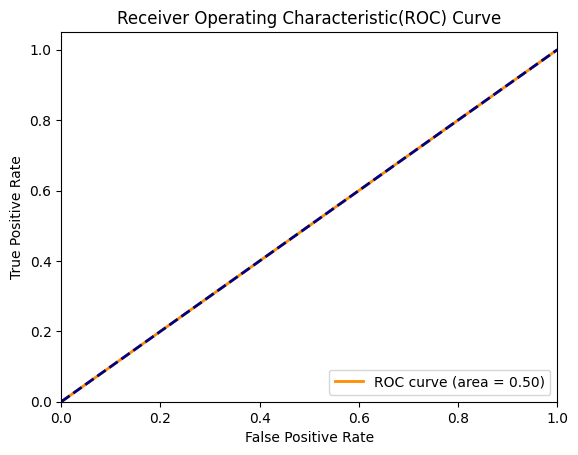

In [ ]:
#Build a ROC for the Evaluation matrix above
#from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, confusion_matrix

#fpr, tpr, _ = roc_curve(target_Binarisationunder, y_pred3, pos_label=1)

#plt.plot(fpr, tpr)
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')
#plt.title('ROC Curve')


fpr, tpr, thresholds = roc_curve(target_Binarisationunder, y_pred3)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic(ROC) Curve')
plt.legend(loc="lower right")
plt.show()


##2.2.2 Comments##
The ROC curve falls below the bisector, indicating poor performance. AUC is 50%. Better models have higher AUC closer to 100%. Optimal models start above the 90-degree line.

##**2.2.3 Confusion Matrix and Its Graphcal Representation**##

This work explore  the confusion matrix to analyse the error predictions in our model.This is also a requirement of task 2 in this research.

In [ ]:
conf_mat = confusion_matrix(target_Binarisationunder, y_pred3, labels=[0, 1])
conf_mat

array([[ 0, 27],
       [ 0, 27]])

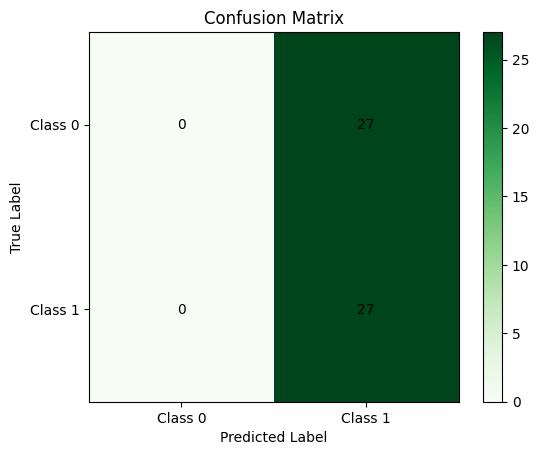

In [ ]:
#Build a Confusion Matrix 

#conf_mat = confusion_matrix(target_Binarisationunder, y_pred3, labels=np.arange(num_classes))
conf_mat = confusion_matrix(target_Binarisationunder, y_pred3, labels=[0, 1])

plt.imshow(conf_mat, cmap='Greens', interpolation='None')
plt.colorbar()

plt.xticks([0, 1], ['Class 0', 'Class 1'])
plt.yticks([0, 1], ['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
        plt.annotate(str(conf_mat[i][j]), xy=(j, i), ha='center', va='center')

plt.show()


##**2.2.4 Comments**##
The confusion matrix shows that the positive images were predidcted correctly and the negative images were all predicted wrongly. It means that the corroded underwater images were correctly classified and the noncorroded underwater images were wrongly classified. This is however expected based on the test datasets.


## **Task 3**##

##Introduction##

To improve model results, we'll use image augmentation by creating image repositories, oversampling, and balancing class to 1:1. This is one of the standard requirement for this experiment at this stage.


In [ ]:
#The image below addresses the oversampling challenge, augumentation and balance the binary classes from 1104 and 128 to 1104 to 1104. 
# In our own case , four images were skipped , this bring all the images to 1100 instead of 1104. Both classes will now be 1100 and 1100. In total , we will have 2200.
import imgaug.augmenters as iaa

# Define the augmentation sequence
augmentation = iaa.Sequential([
    iaa.Flipud(0.5),
    iaa.Fliplr(0.5),
    iaa.Rotate((-45, 45)),
    iaa.GaussianBlur(sigma=(0, 3.0)),
    iaa.Affine(scale=(0.5, 1.5)),
    iaa.AdditiveGaussianNoise(scale=(0, 0.1 * 255)),
    iaa.LinearContrast((0.5, 2.0), per_channel=True),
    iaa.Multiply((0.5, 1.5), per_channel=True),
])

# Get the indices of the positive and negative images
positive_indices = [i for i, t in enumerate(target_Binarisation) if t == 1]
negative_indices = [i for i, t in enumerate(target_Binarisation) if t == 0]

# Calculate the number of images needed to balance the set
num_images = len(positive_indices)
num_images_to_add = num_images - len(negative_indices)

# Randomly sample images from the negative class and augment them
images_to_add = []
for i in range(num_images_to_add):
    idx = np.random.choice(negative_indices)
    img = _images[idx]
    aug_img = augmentation.augment_image(img)
    images_to_add.append(aug_img)

# Concatenate the original and augmented images to balance the set
balanced_images = np.concatenate((_images, images_to_add))
balanced_targets = np.concatenate((target_Binarisation, np.zeros(num_images_to_add, dtype=np.int)))

# Shuffle the data
shuffled_indices = np.random.permutation(len(balanced_images))
balanced_images = balanced_images[shuffled_indices]
balanced_targets = balanced_targets[shuffled_indices]
print('Balanced Images Shape:', balanced_images.shape )
print('Balanced Classes Shape:', balanced_targets.shape )


Balanced Images Shape: (2200, 100, 100)
Balanced Classes Shape: (2200,)


<ipython-input-47-ea3e87cb765b>:35: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  balanced_targets = np.concatenate((target_Binarisation, np.zeros(num_images_to_add, dtype=np.int)))


In [ ]:
target_Binarisation.shape # This shows the original class of the surface image which is the training data.

(1228,)

##**Plot Bar chart of the Class**##
This shows the class balances and imbalances.

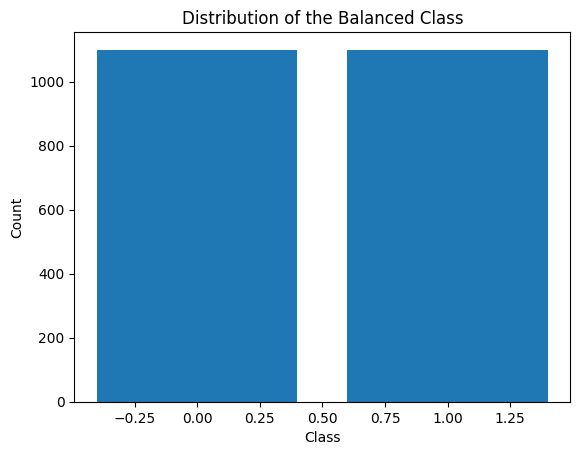

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each target value
target_counts = {}
for target in balanced_targets:
    if target in target_counts:
        target_counts[target] += 1
    else:
        target_counts[target] = 1

# Create a bar chart of the target counts
plt.bar(target_counts.keys(), target_counts.values())

# Add axis labels and title
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of the Balanced Class')

# Show the plot
plt.show()

##**Comment**##
Keras augmentation creates an imaginary class to oversample the minority class. Negative labels are -0.25, 0, 0.25, and Positive are 0.75, 1, 1.25. The technique learns from neighbors to create balance.

In [ ]:
# Randomly sample images from the negative class and augment them
images_to_add = []
for i in range(num_images_to_add):
    idx = np.random.choice(negative_indices)
    img = _images[idx]
    aug_img = augmentation.augment_image(img)
    print(aug_img)
    images_to_add.append(aug_img)

Streaming output truncated to the last 5000 lines.
 [169 223 172 ... 240 255 255]
 [123 174 227 ... 247 255 255]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[ 0  0  0 ...  0  0  6]
 [ 0 20 24 ... 14  0  0]
 [20  0 14 ...  0  0  0]
 ...
 [ 3 22  0 ...  0 23  0]
 [ 0  0 29 ...  0  0  0]
 [ 0  0  0 ...  6  0 20]]
[[ 80  95  95 ... 100  97  73]
 [ 98  82 100 ... 104  99  99]
 [101  82  97 ... 102 102 106]
 ...
 [122 125 123 ... 122 118 122]
 [106 133 121 ... 120 118 114]
 [ 81 113 124 ... 125 114  96]]
[[42 42 42 ... 42 42 42]
 [42 42 42 ... 42 42 42]
 [42 42 42 ... 42 42 42]
 ...
 [42 42 42 ... 42 42 42]
 [42 42 42 ... 42 42 42]
 [42 42 42 ... 42 42 42]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[ 69  64  51 ... 192 157 177]
 [ 67  78  59 ... 175 174 175]
 [ 48  69  70 ... 164 190 184]
 ...
 [ 64  85  68 ...  92  73  92]
 [ 69  45  69

In [ ]:
balanced_images.shape #Images 1104 has been augumented to 2200 because 4 of the images droped for some resons when the data is loaded. It then reduced the aumentation process to 2200.

(2200, 100, 100)

##**Convert the target Variabe to Vector**##

This is neccesary for machine learning or most of supervised learning model

In [ ]:
#images_to_add

In [ ]:
y_train_categorical3 = np_utils.to_categorical(balanced_targets, 2) #changing array to vectors
y_test_categorical = np_utils.to_categorical(target_Binarisationunder, 2)
# Show a sample target entry. You will see that this sample corresponds to a 5 as
# there is a five in the 0th position (remember that python starts in 0)
print(y_train_categorical3[2:4]) # Show the vector variable between index 2 and 3
print(y_train_categorical[-1]) #Show the last index of the data sets.
#plt.imshow(y_train_categorical[0])

[[1. 0.]
 [1. 0.]]
[0. 1.]


##**Prepare the CNN Architecture for Task 3**##
The same tuning function will be used to obtain required model metrics. Tuning can be adjusted based on the situation, such as increasing dropout to 50% or higher at the first layer and changing activation to sigmoid or tanh.

In [ ]:
#Set the seed to allow the model output to be reproducible
np.random.seed(123)

model3 = Sequential()
model3.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100,100,1)))
model3.add(Conv2D(32, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Dropout(0.25))
model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(2, activation='softmax'))

##**Model Summary and Compilation**##

In [ ]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 98, 98, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 96, 96, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 48, 48, 32)        0         
                                                                 
 flatten_2 (Flatten)         (None, 73728)             0         
                                                                 
 dense_4 (Dense)             (None, 128)               9437312   
                                                      

In [ ]:
model3.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model3.fit(balanced_images, y_train_categorical3 , epochs = 20, batch_size=32, verbose = 1 )

Epoch 1/20
69/69 [==============================] - 4s 23ms/step - loss: 32.0044 - accuracy: 0.6436
Epoch 2/20
69/69 [==============================] - 1s 18ms/step - loss: 0.4564 - accuracy: 0.7677
Epoch 3/20
69/69 [==============================] - 1s 18ms/step - loss: 0.3428 - accuracy: 0.8564
Epoch 4/20
69/69 [==============================] - 1s 18ms/step - loss: 0.2518 - accuracy: 0.9109
Epoch 5/20
69/69 [==============================] - 1s 18ms/step - loss: 0.1975 - accuracy: 0.9386
Epoch 6/20
69/69 [==============================] - 1s 18ms/step - loss: 0.1588 - accuracy: 0.9495
Epoch 7/20
69/69 [==============================] - 1s 19ms/step - loss: 0.1514 - accuracy: 0.9509
Epoch 8/20
69/69 [==============================] - 1s 19ms/step - loss: 0.2115 - accuracy: 0.9445
Epoch 9/20
69/69 [==============================] - 1s 18ms/step - loss: 0.1677 - accuracy: 0.9459
Epoch 10/20
69/69 [==============================] - 1s 18ms/step - loss: 0.1654 - accuracy: 0.9477
Epoch 11

##**Model3 Prediction and Evaluation**##

In [ ]:
y_pred4 = model3.predict(_imagesUnder)
y_pred4 = np.argmax(y_pred4, axis=1)
accuracy = accuracy_score(target_Binarisationunder, y_pred4)
precision = precision_score(target_Binarisationunder, y_pred4, average='weighted')
recall = recall_score(target_Binarisationunder, y_pred4, average='weighted')
f1 = f1_score(target_Binarisationunder, y_pred4, average='weighted')

print('Test Accuracy:', accuracy)
print('Test Precision:', precision)
print('Test Recall:', recall)
print('Test F1-score:', f1)


2/2 [==============================] - 0s 5ms/step
Test Accuracy: 0.4074074074074074
Test Precision: 0.35729386892177584
Test Recall: 0.4074074074074074
Test F1-score: 0.35037593984962406


##**Confusion Matrix for Model3**##

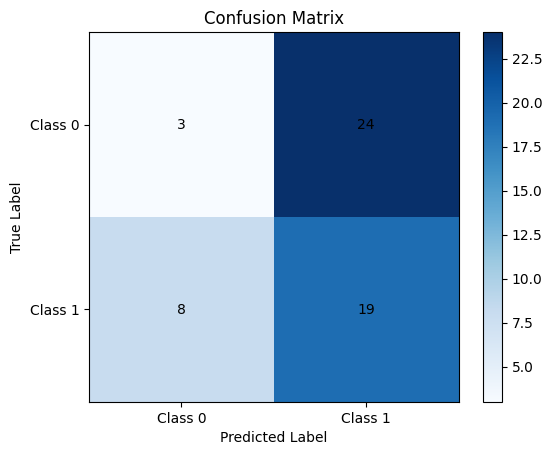

In [ ]:
cmatrix = confusion_matrix(target_Binarisationunder, y_pred4)
cmatrix 
plt.imshow(cmatrix, cmap='Blues', interpolation='None')
plt.colorbar()

plt.xticks([0, 1], ['Class 0', 'Class 1'])
plt.yticks([0, 1], ['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

for i in range(cmatrix.shape[0]):
    for j in range(cmatrix.shape[1]):
        plt.annotate(str(cmatrix[i][j]), xy=(j, i), ha='center', va='center')

plt.show()

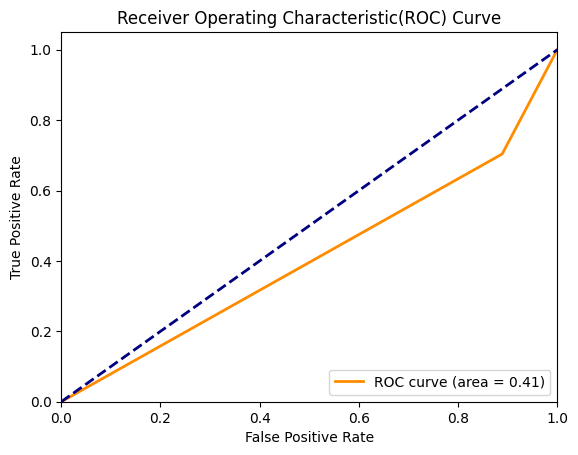

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(target_Binarisationunder, y_pred4)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic(ROC) Curve')
plt.legend(loc="lower right")
plt.show()

##**Comments**##
Model 3's metrics show poor accuracy (0.48) and ROC trends fall below the line. Confusion matrix: 19 TP, 3 TN, 8 FN, and 24 FP. Augmentation slightly improved performance, but not significantly.

##**Task 4**##

##Introduction##
The requirement of the task is to get more underwatter positive and negative images to improve the overall performance of the model as seen in task 3. It means that, underwater images will be splited to training and testing images.

##Reading the New Underwater Images##

This word  obtained 1,114 Negative and 380 Positive underwater images for this research. 

In [ ]:
resize_width = 100 #Resizing the width of the images
resize_height = 100 #Resizing the Lenghts of the Images
path = '/content/gdrive/MyDrive/Underwater-NewdataUpdate/' #Reading the path
_images4 = [] # List to append the images as 2D numpy arrays.
_target4 = [] # List to append the target
O_repo4 = [] # Create a repo for flattened pixels
threshold4 = []
repothreshold4 = []

for root, dirs, files in os.walk(path):
     for file in files:
        with open(os.path.join(root, file), "r") as auto:
            try:
                img4 = cv2.imread(root+'/'+file, 0)
                #imgshow = plt.imshow(img)
                img4 = cv2.resize(img4, (resize_width, resize_height))
                ret,threshold4 = cv2.threshold(img4,127,255,cv2.THRESH_BINARY)
                repothreshold4.append(threshold4)
                _images4.append(img4)
                # Append the flattened image to the pixel repo
                O_repo4.append(img4.flatten())
                # Append the folder where the image is to the target list
                _target4.append(root.replace(path,'').replace('\\','').replace('/',''))
            except Exception as e:
                print("Invalid file "+file+" skipped.")
# Convert the repo list into numpy array
O_repo4 = np.array(O_repo4)
repothreshold4 = np.array(repothreshold4)
_images4 = np.array(_images4)
#_target4 = np.array(_target4)
#plt.imshow(_images4)
print('Print the images in numpy array:', repothreshold4)
print('The classes or target of the datasets:', _target4)
print('Shapes of the underwater images:',repothreshold4.shape)
print('The size of the Binarised Images:', repothreshold4.shape)
print('The shape of the _images', _images4.shape)
#print('The size of the Target Images:', _target4.size)

Invalid file Positive(357).DS_Store skipped.
Print the images in numpy array: [[[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  ...
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]]

 [[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0 255 ...   0   0   0]
  ...
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]]

 [[255 255 255 ...   0   0   0]
  [255 255 255 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  ...
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]]

 ...

 [[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  ...
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]]

 [[255 255 255 ...   0   0   0]
  [255 255 255 ...   0   0   0]
  [255 255 255 ...   0   0   0]
  ...
  [255 255 255

##**Plot the Classes of the new Image**##

This approach will give us an idea of what the classs imbalances looks like.

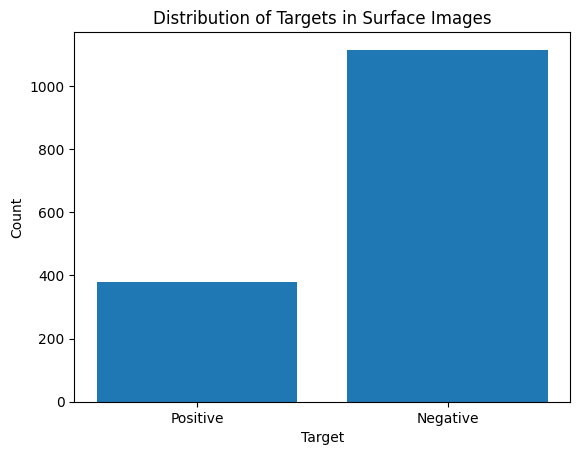

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each target value
target_counts = {}
for target in _target4:
    if target in target_counts:
        target_counts[target] += 1
    else:
        target_counts[target] = 1

# Create a bar chart of the target counts
plt.bar(target_counts.keys(), target_counts.values())

# Add axis labels and title
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Distribution of Targets in Surface Images')

# Show the plot
plt.show()

##Comments##

The binary class problem has a 30% imbalance ratio. To address this, we'll oversample the minority class to match the majority class by creating image repositories using Keras image augmentation.

##**Reshaping the images**##

##**Binarising the new Underwater Images**##

In [ ]:
target_Binarisationunder4 = []
target_Binarisationunder4 = [1 if i == 'Positive' else 0 for i in _target4]
target_Binarisationunder4=np.array(target_Binarisationunder4)
print(target_Binarisationunder4,target_Binarisationunder4.shape)



[1 1 1 ... 0 0 0] (1494,)


In [ ]:
target_Binarisationunder41 = np.unique(target_Binarisationunder4) #Checking the unique target after binarisation
target_Binarisationunder41

array([0, 1])

##**Vectorising the Class**##

This convert the class to a vector and prepares the class for a machine learning model.

[0. 1.]


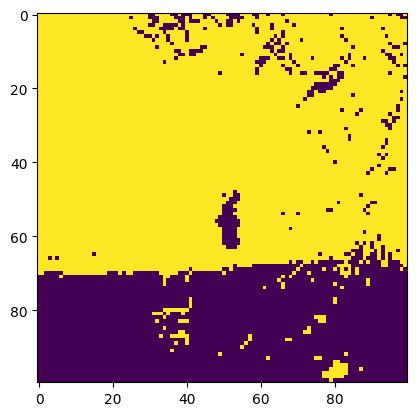

In [ ]:
y_train_categorical4 = np_utils.to_categorical(target_Binarisationunder4, 2) #Convert the list of target array to vector
y_test_categorical4 = np_utils.to_categorical(target_Binarisationunder4, 2)
# Show a sample target entry. You will see that this sample corresponds to a 5 as
# there is a five in the 0th position (remember that python starts in 0)
print(y_train_categorical4[9])
plt.imshow(repothreshold4[7])
#plt.imshow(X_train[8])

##**Building the Fourth CNN Model Architecture**##

Most of the parameter tunning have been discussed in the previous tasks. We are going to replicate the same here.

In [ ]:
#Set the seed to allow the model output to be reproducible
np.random.seed(123)

model4 = Sequential()
model4.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100,100,1)))
model4.add(Conv2D(32, (3, 3), activation='relu'))
model4.add(MaxPooling2D(pool_size=(2,2)))
model4.add(Dropout(0.25))
model4.add(Flatten())
model4.add(Dense(128, activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(2, activation='softmax'))

##**Summarising the Forth CNN Model**##

In [ ]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 98, 98, 32)        320       
                                                                 
 conv2d_7 (Conv2D)           (None, 96, 96, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 48, 48, 32)        0         
                                                                 
 flatten_3 (Flatten)         (None, 73728)             0         
                                                                 
 dense_6 (Dense)             (None, 128)               9437312   
                                                      

##**Augumenting the New Images**##

This is neccesary to create a balanced datasets. The graphical representation of the imbalance class was shown through the bar chart shown above. At this stage , we will be creating a 1: 1 positive and negative classes. This may improve the model performance.

In [ ]:
import imgaug.augmenters as iaa

# Define the augmentation sequence
augmentation = iaa.Sequential([
    iaa.Flipud(0.5),
    iaa.Fliplr(0.5),
    iaa.Rotate((-45, 45)),
    iaa.GaussianBlur(sigma=(0, 3.0)),
    iaa.Affine(scale=(0.5, 1.5)),
    iaa.AdditiveGaussianNoise(scale=(0, 0.1 * 255)),
    iaa.LinearContrast((0.5, 2.0), per_channel=True),
    iaa.Multiply((0.5, 1.5), per_channel=True),
])

# Get the indices of the positive and negative images
positive_indices4 = [i for i, t in enumerate(target_Binarisationunder4) if t == 1]
negative_indices4 = [i for i, t in enumerate(target_Binarisationunder4) if t == 0]

# Calculate the number of images needed to balance the set
num_images4 = len(positive_indices4)
num_images_to_add4 = len(negative_indices4) - num_images4

# Randomly sample images from the negative class and augment them
images_to_add4 = []
for i in range(num_images_to_add4):
    idx4 = np.random.choice(negative_indices4)
    img4 = _images4[idx4]
    aug_img4 = augmentation.augment_image(img4)
    images_to_add4.append(aug_img4)

# Concatenate the original and augmented images to balance the set
balanced_images4 = np.concatenate((_images4, images_to_add4))
balanced_targets4 = np.concatenate((target_Binarisationunder4, np.zeros(num_images_to_add4, dtype=np.int)))

# Shuffle the data
shuffled_indices4 = np.random.permutation(len(balanced_images4))
balanced_images4 = balanced_images4[shuffled_indices4]
balanced_targets4 = balanced_targets4[shuffled_indices4]
print('Balanced Images', balanced_images4.shape)
print('Balanced Class', balanced_targets4.shape)




Balanced Images (2230, 100, 100)
Balanced Class (2230,)


<ipython-input-66-17a4a11fd8ee>:33: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  balanced_targets4 = np.concatenate((target_Binarisationunder4, np.zeros(num_images_to_add4, dtype=np.int)))


##**Spliting the Balanced Images**##

The balanced dataset for the new underwater is expected to be splited into train and test.

In [ ]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(balanced_images4 , balanced_targets4, stratify= balanced_targets4 ,test_size=0.2)

y_train4 = np_utils.to_categorical(y_train4, 2) #Convert the list of target array to vector
#y_test_categorical4 = np_utils.to_categorical(target_Binarisationunder4, 2)
# Show a sample target entry. You will see that this sample corresponds to a 5 as
# there is a five in the 0th position (remember that python starts in 0)
#print(y_train_categorical4[0])
#plt.imshow(repothreshold4[0])
#plt.imshow(X_train[0])

In [ ]:
#Showing the shapes of the new splited images
print(X_train4.shape)
print(X_test4.shape)
print(y_train4.shape)
print(y_test4.shape)

(1784, 100, 100)
(446, 100, 100)
(1784, 2)
(446,)


##**Compiling and Fit Model4**##

In [ ]:
model4.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model4.fit(X_train4, y_train4 , epochs = 20, batch_size=32, verbose = 1 )



Epoch 1/20
56/56 [==============================] - 4s 21ms/step - loss: 77.5048 - accuracy: 0.7629
Epoch 2/20
56/56 [==============================] - 1s 18ms/step - loss: 0.4591 - accuracy: 0.8380
Epoch 3/20
56/56 [==============================] - 1s 18ms/step - loss: 0.3742 - accuracy: 0.8447
Epoch 4/20
56/56 [==============================] - 1s 18ms/step - loss: 0.3336 - accuracy: 0.8503
Epoch 5/20
56/56 [==============================] - 1s 18ms/step - loss: 0.2774 - accuracy: 0.8733
Epoch 6/20
56/56 [==============================] - 1s 18ms/step - loss: 0.2111 - accuracy: 0.9008
Epoch 7/20
56/56 [==============================] - 1s 18ms/step - loss: 0.1736 - accuracy: 0.9271
Epoch 8/20
56/56 [==============================] - 1s 18ms/step - loss: 0.1637 - accuracy: 0.9383
Epoch 9/20
56/56 [==============================] - 1s 19ms/step - loss: 0.1229 - accuracy: 0.9535
Epoch 10/20
56/56 [==============================] - 1s 19ms/step - loss: 0.1082 - accuracy: 0.9580
Epoch 11

##**Model Prediction and Evaluation**##

In [ ]:
y_pred5 = model4.predict(X_test4)
y_pred5 = np.argmax(y_pred5, axis=1)
accuracy4 = accuracy_score(y_test4, y_pred5)
precision4 = precision_score(y_test4, y_pred5, average='weighted')
recall4 = recall_score(y_test4, y_pred5, average='weighted')
fscore4 = f1_score(y_test4, y_pred5, average='weighted')

print('Test Accuracy:', accuracy4)
print('Test Precision:', precision4)
print('Test Recall:', recall4)
print('Test F1-score:', fscore4)

14/14 [==============================] - 1s 43ms/step
Test Accuracy: 0.8542600896860987
Test Precision: 0.8357249712566119
Test Recall: 0.8542600896860987
Test F1-score: 0.8371633328378776


##**Confusion Matrix and Its Graphical Representation**##

In [ ]:
cm = confusion_matrix(y_test4, y_pred5)
cm


array([[354,  16],
       [ 49,  27]])

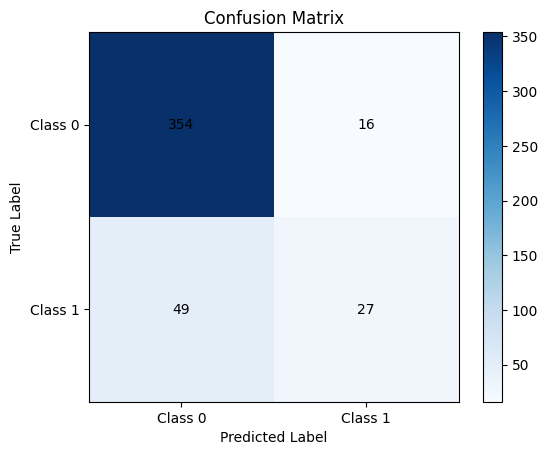

In [ ]:

plt.imshow(cm, cmap='Blues', interpolation='None')
plt.colorbar()

plt.xticks([0, 1], ['Class 0', 'Class 1'])
plt.yticks([0, 1], ['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.annotate(str(cm[i][j]), xy=(j, i), ha='center', va='center')

plt.show()

# From the confusion matrix , the model makes some wrong decisions which are obviously seen in the false negative and the false positive session of the graph.They are 52 and 32 respectively



##**Model4 AUC**##

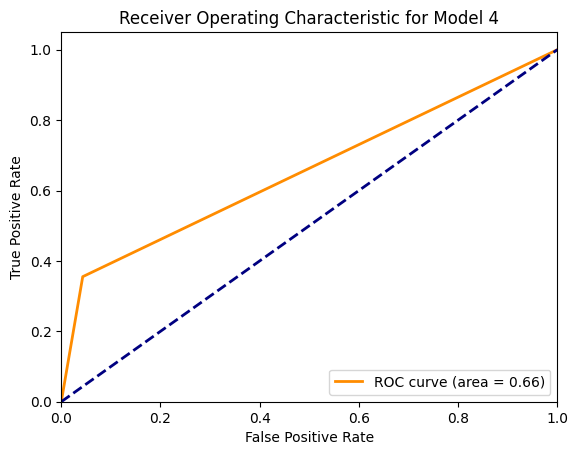

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test4, y_pred5)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Model 4')
plt.legend(loc="lower right")
plt.show()

##Comments##

There are now 1,635 images in the new set. The model achieved impressive metrics: test accuracy, precision, recall, and F1-score were all high. However, there were 63 wrong predictions with 12 false positives and 51 false negatives. The AUC was 65%, slightly above the borderline.



##**Setting a Cross Validation Method for Task 4 to Address overfitting**##

We will use thesame 5 fold cross validation technic and see if this will add to the overall performance of the model.

In [ ]:
CrossValidation4 = StratifiedKFold(n_splits=5)
CrossValidation4.get_n_splits(balanced_images4, balanced_targets4)
print(CrossValidation4) #This is going to train and test the data in fice fold randomly. 

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)


In [ ]:
#Set the seed to allow the model output to be reproducible
np.random.seed(123)

model5 = Sequential()
model5.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100,100,1)))
model5.add(Conv2D(32, (3, 3), activation='relu'))
model5.add(MaxPooling2D(pool_size=(2,2)))
model5.add(Dropout(0.25))
model5.add(Flatten())
model5.add(Dense(128, activation='relu'))
model5.add(Dropout(0.5))
model5.add(Dense(2, activation='softmax'))

##**Vectorisation  of the Variable**##


In [ ]:
y_train_categorical5 = np_utils.to_categorical(balanced_targets4, 2) #changing array to vectors


In [ ]:
model5.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

##**Model5 and Prediction and Evaluation**##

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Set the seed to allow the model output to be reproducible
np.random.seed(123)

accuracy6 = []
precision6 = []
recall6 = []
fscore6 = []

for fold, (train_indices, val_indices) in enumerate(CrossValidation4.split(y_train_categorical5, np.argmax(y_train_categorical5, axis=1))):
    # Get the training and validation data for this fold
    X_train, y_train = balanced_images4[train_indices], y_train_categorical5[train_indices]
    X_val, y_val = balanced_images4[val_indices], y_train_categorical5[val_indices]
    
    # Train the model on this fold
    history = model5.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val))

    y_pred6 = model5.predict(X_val)
    y_pred6 = np.argmax(y_pred6, axis=1)
    y_val6 = np.argmax(y_val, axis=1)

    precision6.append(precision_score(y_val6, y_pred6, average='weighted'))
    recall6.append(recall_score(y_val6, y_pred6, average='weighted'))
    fscore6.append(f1_score(y_val6, y_pred6, average='weighted'))
    accuracy6.append(accuracy_score(y_val6, y_pred6))  # Add accuracy score to the list

print('Mean Precision:', np.mean(precision6))
print('Mean Recall:', np.mean(recall6))
print('Mean F1-score:', np.mean(fscore6))
print('Mean Accuracy:', np.mean(accuracy6))  # Print the mean accuracy


Epoch 1/5
56/56 [==============================] - 1s 21ms/step - loss: 0.0501 - accuracy: 0.9809 - val_loss: 0.0129 - val_accuracy: 0.9978
Epoch 2/5
56/56 [==============================] - 1s 20ms/step - loss: 0.0460 - accuracy: 0.9821 - val_loss: 0.0160 - val_accuracy: 0.9955
Epoch 3/5
56/56 [==============================] - 1s 20ms/step - loss: 0.0426 - accuracy: 0.9837 - val_loss: 0.0140 - val_accuracy: 0.9955
Epoch 4/5
56/56 [==============================] - 1s 22ms/step - loss: 0.0548 - accuracy: 0.9809 - val_loss: 0.0174 - val_accuracy: 0.9955
Epoch 5/5
14/14 [==============================] - 0s 3ms/step
Epoch 1/5
56/56 [==============================] - 1s 22ms/step - loss: 0.0691 - accuracy: 0.9737 - val_loss: 0.0195 - val_accuracy: 0.9978
Epoch 2/5
56/56 [==============================] - 1s 20ms/step - loss: 0.0405 - accuracy: 0.9871 - val_loss: 0.0220 - val_accuracy: 0.9978
Epoch 3/5
56/56 [==============================] - 1s 20ms/step - loss: 0.0358 - accuracy: 0.9860

##**Confusion Matrix and Graph**##


In [ ]:
cm4 = confusion_matrix(y_val6, y_pred6)
cm4

array([[371,   0],
       [  0,  75]])

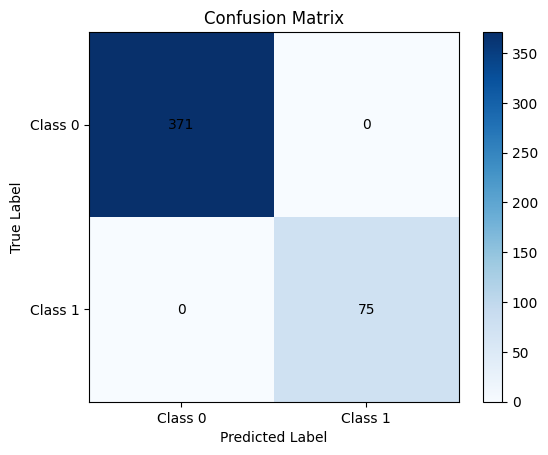

In [ ]:
plt.imshow(cm4, cmap='Blues', interpolation='None')
plt.colorbar()

plt.xticks([0, 1], ['Class 0', 'Class 1'])
plt.yticks([0, 1], ['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

for i in range(cm4.shape[0]):
    for j in range(cm4.shape[1]):
        plt.annotate(str(cm4[i][j]), xy=(j, i), ha='center', va='center')

plt.show()

##**ROC for Model Model 6**##

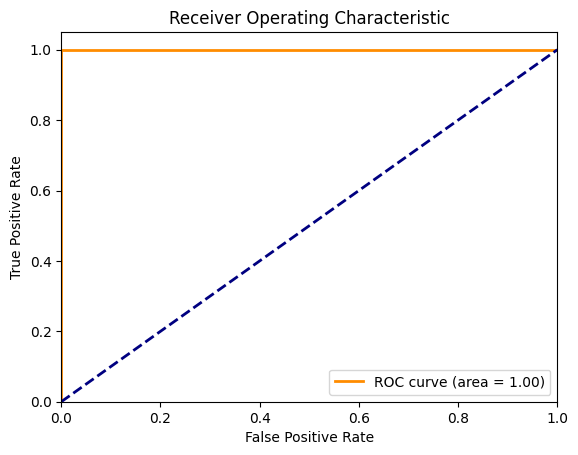

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_val6, y_pred6)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

##**Comments:**##

To improve model accuracy on underwater image classification, the research used image augmentation, and a CNN model with five-fold cross-validation and five epochs. The resulting model achieved 100% ROC rate and high accuracy, recall, precision, and F1 scores. This is the  highligh of the  effective techniques for the best model as seen above.
  










##**Validating with New Datasets**##


##**Model5 Prediction on Other Images**##

The aim is to get the model performance on the other underwater images aside from the original underwater images that was used to train and test the original model. These images will be used to validate the performance of the best model. The process is as seen below:

## Importing the New Images##

In [ ]:
resize_width = 100 #Resizing the width of the images
resize_height = 100 #Resizing the Lenghts of the Images
path = '/content/gdrive/MyDrive/Validation_UnderwaterImages' #Reading the path
_imagesval = [] # List to append the images as 2D numpy arrays.
_targetval = [] # List to append the target
O_repoval = [] # Create a repo for flattened pixels
thresholdval = []
repothresholdval = []

for root, dirs, files in os.walk(path):
     for file in files:
        with open(os.path.join(root, file), "r") as auto:
            try:
                imgval = cv2.imread(root+'/'+file, 0)
                #imgshow = plt.imshow(img)
                imgval = cv2.resize(img4, (resize_width, resize_height))
                ret,thresholdval = cv2.threshold(imgval,127,255,cv2.THRESH_BINARY)
                repothresholdval.append(thresholdval)
                _imagesval.append(imgval)
                # Append the flattened image to the pixel repo
                O_repoval.append(img4.flatten())
                # Append the folder where the image is to the target list
                _targetval.append(root.replace(path,'').replace('\\','').replace('/',''))
            except Exception as e:
                print("Invalid file "+file+" skipped.")
# Convert the repo list into numpy array
O_repoval = np.array(O_repoval)
repothresholdval = np.array(repothresholdval)
_imagesval = np.array(_imagesval)
#_target4 = np.array(_target4)
#plt.imshow(_images4)
print('Print the images in numpy array:', repothresholdval)
print('The classes or target of the datasets:', _targetval)
print('Shapes of the underwater images:',repothresholdval.shape)
print('The size of the Binarised Images:', repothresholdval.shape)
print('The shape of the _images', _imagesval.shape)
#print('The size of the Target Images:', _target4.size)

Print the images in numpy array: [[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
The classes or target of the datasets: ['Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive

In [ ]:
target_Binarisationunder6 = []
target_Binarisationunder6 = [1 if i == 'Positive' else 0 for i in _targetval]
target_Binarisationunder6=np.array(target_Binarisationunder6)
print(target_Binarisationunder6,target_Binarisationunder6.shape)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] (100,)


In [ ]:
y_pred8 = model5.predict(_imagesval)
y_pred8 = np.argmax(y_pred8, axis=1)
accuracy8 = accuracy_score(target_Binarisationunder6, y_pred8)
precision8 = precision_score(target_Binarisationunder6, y_pred8, average='weighted')
recall8 = recall_score(target_Binarisationunder6, y_pred8, average='weighted')
fscore8 = f1_score(target_Binarisationunder6, y_pred8, average='weighted')

print('Test Accuracy:', accuracy8)
print('Test Precision:', precision8)
print('Test Recall:', recall8)
print('Test F1-score:', fscore8)

4/4 [==============================] - 0s 4ms/step
Test Accuracy: 0.5
Test Precision: 0.25
Test Recall: 0.5
Test F1-score: 0.33333333333333326


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##Comments##
Model5's performance decreased when tested on different underwater images. It still struggles to correctly classify positive and negative classes. Further studies should focus on acquiring more underwater corroded images to potentially improve the model metrics.

## **Transfer Learning VGG16 Model**##

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import numpy as np
from PIL import Image

np.random.seed(123)

# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(100, 100, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)

# Create the transfer learning model
modelTRF = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
modelTRF.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

accuracy6 = []
precision6 = []
recall6 = []
fscore6 = []

for fold, (train_indices, val_indices) in enumerate(CrossValidation4.split(balanced_images4, np.argmax(y_train_categorical5, axis=1))):
    # Get the training and validation data for this fold
    X_train, y_train = balanced_images4[train_indices], y_train_categorical5[train_indices]
    X_val, y_val = balanced_images4[val_indices], y_train_categorical5[val_indices]

    # Resize and convert images to RGB color channels
    X_train_resized = []
    for img in X_train:
        img_resized = Image.fromarray(img).resize((100, 100))
        img_rgb = img_resized.convert('RGB')
        X_train_resized.append(np.array(img_rgb))

    X_val_resized = []
    for img in X_val:
        img_resized = Image.fromarray(img).resize((100, 100))
        img_rgb = img_resized.convert('RGB')
        X_val_resized.append(np.array(img_rgb))

    X_train_resized = np.array(X_train_resized)
    X_val_resized = np.array(X_val_resized)

    # Train the model on this fold
    history = model.fit(X_train_resized, y_train, epochs=5, batch_size=32, validation_data=(X_val_resized, y_val))

    y_pred6 = model.predict(X_val_resized)
    y_pred6 = np.argmax(y_pred6, axis=1)
    y_val6 = np.argmax(y_val, axis=1)

    precision6.append(precision_score(y_val6, y_pred6, average='weighted'))
    recall6.append(recall_score(y_val6, y_pred6, average='weighted'))
    fscore6.append(f1_score(y_val6, y_pred6, average='weighted'))
    accuracy6.append(accuracy_score(y_val6, y_pred6))

print('Mean Precision:', np.mean(precision6))
print('Mean Recall:', np.mean(recall6))
print('Mean F1-score:', np.mean(fscore6))
print('Mean Accuracy:', np.mean(accuracy6))


Epoch 1/5
56/56 [==============================] - 2s 43ms/step - loss: 0.0061 - accuracy: 0.9983 - val_loss: 0.0155 - val_accuracy: 0.9955
Epoch 2/5
56/56 [==============================] - 3s 46ms/step - loss: 0.0030 - accuracy: 0.9994 - val_loss: 0.0168 - val_accuracy: 0.9955
Epoch 3/5
56/56 [==============================] - 3s 46ms/step - loss: 0.0025 - accuracy: 0.9994 - val_loss: 0.0180 - val_accuracy: 0.9955
Epoch 4/5
56/56 [==============================] - 3s 46ms/step - loss: 0.0022 - accuracy: 0.9994 - val_loss: 0.0166 - val_accuracy: 0.9955
Epoch 5/5
14/14 [==============================] - 0s 32ms/step
Epoch 1/5
56/56 [==============================] - 3s 47ms/step - loss: 0.0083 - accuracy: 0.9978 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 2/5
56/56 [==============================] - 3s 46ms/step - loss: 0.0046 - accuracy: 0.9983 - val_loss: 0.0114 - val_accuracy: 0.9978
Epoch 3/5
56/56 [==============================] - 2s 43ms/step - loss: 0.0074 - accuracy: 0.998

## **Model Summary**##

At this stage, the all time models are combined to form a pandas data frame and visualised for ease of accessment. Below codes and visuals is sufficient.

In [ ]:
import pandas as pd

# Results dictionary
Results = {
    'Model_Names': ['SVM_Surface', 'CNN_Surface', 'CNNTest_Underwater', 'CNN_Augument', 'CNN_NewUnderwImages', 'CNN_NewUnderwImagesCV', 'TransferLearning'],
    'Metrics_Name': ['Accuracies', 'Recalls', 'Precisions', 'F1Scores'],
    'Metrics_Values': [
        [0.86, 0.97, 0.50, 0.41, 0.85, 0.99, 0.99],
        [0.86, 0.97, 0.50, 0.41, 0.85, 0.99, 0.99],
        [0.83, 0.96, 0.25, 0.36, 0.84, 0.99, 0.99],
        [0.84, 0.96, 0.33, 0.35, 0.84, 0.99, 0.99]
    ]
}

# Create an empty DataFrame
df = pd.DataFrame()

# Add 'Model_Names' column
df['Model_Names'] = Results['Model_Names']

# Add metrics as columns
for i, metric_name in enumerate(Results['Metrics_Name']):
    df[metric_name] = Results['Metrics_Values'][i]

# Set 'Model_Names' as the index
df.set_index('Model_Names', inplace=True)

# Print the DataFrame
print(df)

                       Accuracies  Recalls  Precisions  F1Scores
Model_Names                                                     
SVM_Surface                  0.86     0.86        0.83      0.84
CNN_Surface                  0.97     0.97        0.96      0.96
CNNTest_Underwater           0.50     0.50        0.25      0.33
CNN_Augument                 0.41     0.41        0.36      0.35
CNN_NewUnderwImages          0.85     0.85        0.84      0.84
CNN_NewUnderwImagesCV        0.99     0.99        0.99      0.99
TransferLearning             0.99     0.99        0.99      0.99


## **Comments**##

It is evidenced in the above work that CNN and transfer learning outforms other models when predicting both the coroded and non corroded images for surfaces and underwater. Specifically, Transfer learning with all VGG16 parameter tunning should be used for predicting future images for underwater and surfaces in the oil and gas company.

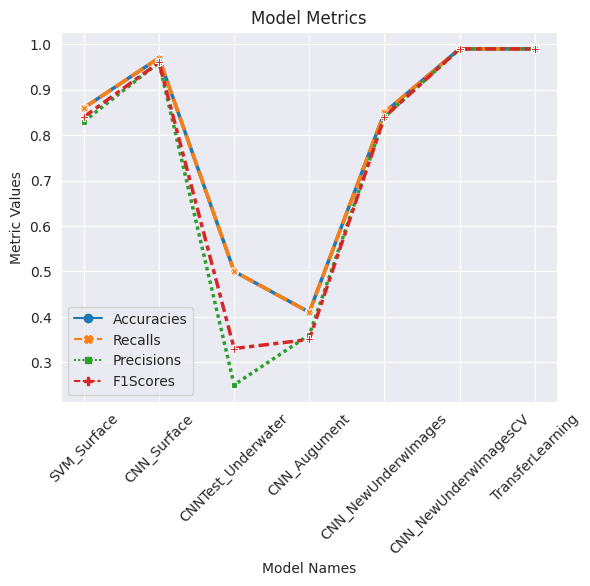

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set_style("darkgrid")

# Plot the line chart
sns.lineplot(data=df, markers=True, linewidth=2.5)

# Set the title and labels
plt.title('Model Metrics')
plt.xlabel('Model Names')
plt.ylabel('Metric Values')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()

##**References**##

1.Google- Underwater Corroded Images- https://www.google.com/search?q=underwater+corodded+images&oq=underwater+corodded+images&aqs=chrome..69i57j33i10i160.8216j0j7&sourceid=chrome&ie=UTF-8

2.Kaggle- https://www.kaggle.com/code/soumya9977/learning-to-sea-underwater-img-enhancement-eda

3.StackOverflow Resources-https://www.kaggle.com/code/landfallmotto/60k-stack-overflow-questions-keras-lstm-and-cnn

4.Tensorflow Library- https://www.tensorflow.org/tutorials/images/cnn
